# WeRateDogs Data Wrangling Project

## The Purpose of This Project

As per the project motivation and instruction, the gaol is to "wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations."

Three data sources will be used for the analysis:
 - Tweet Archive
 - Image Prediction
 - Twitter API interaction data

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
#import glob as gb
#import json
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="dark")

% matplotlib inline

### **1. Data Gathering**

The purpose of this step is

Reading data already provided for by Udacity

In [2]:


archive=pd.read_csv('twitter-archive-enhanced.csv')
pred=pd.read_csv('image-predictions.tsv', delimiter="\t") #the dellimiter was found through manual inspection of the file

***Due to the lack of access to Twitter API, the ready JSON file from step #4 Twitter API was used instead.***

In [3]:
#Reading the txt file into a datadframe, for reference
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html
tw_interactions=pd.read_json('tweet-json.txt',lines=True)

### **2. Data Assessment**

The purpose of this step is visually and programatically assess the available data that we extracted in the first step.

Exploring available data.
- **2.1 Archive Dataframe**

In [4]:
archive.info()
archive.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
archive.name.value_counts()

None            745
a                55
Charlie          12
Lucy             11
Oliver           11
Cooper           11
Tucker           10
Lola             10
Penny            10
Bo                9
Winston           9
Sadie             8
the               8
an                7
Toby              7
Buddy             7
Bailey            7
Daisy             7
Bella             6
Milo              6
Scout             6
Oscar             6
Leo               6
Jax               6
Jack              6
Koda              6
Rusty             6
Dave              6
Stanley           6
Louis             5
               ... 
Gordon            1
Dale              1
Jangle            1
Jeffrie           1
Binky             1
Snoop             1
Tayzie            1
Dallas            1
Mitch             1
Yoda              1
Kevon             1
Chevy             1
Derby             1
Sully             1
Jimbo             1
Andru             1
Cermet            1
unacceptable      1
Claude            1


First notes from the **Archive** dataframe:
- tweet_id is an integer, while this is not really an issue it technically should be a string
- timestamp is an object (string), should be parced as datetime
- columns with too many missing information that should be  deleted, as they are not strongly needed by this analysis, and the dataframe would be cleaner (source,in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id ,  retweeted_status_timestamp)
- The doggo, floofer, pupper, poppo columns are values, not column titles. merging them into a new column, let's say "Category" would be useful. The null value is also shown as None, which bypasses the programatic assessment. 
- The name column also has "None" values rather than nulls.
- some rating_denominator data is not 10 (20 in total), isn't 10 is the default value?. A conversion might be necessary.
- one rating_denominator value is zero, this might need to be removed.

Everything else appears to be fine from a first look.


In [6]:
archive[archive['rating_denominator']>10].tweet_id.count()

20

- **2.2 Predictions Dataframe**

In [7]:
pred.info()
pred.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


First notes from the **Predictions** dataframe:
- tweet_id is an integer, while this is not really an issue it technically should be a string
- jpg_url column might not be necessary, but we will keep it for th etime being since the dataset is small anyway
- dog names are seperated with "_", while this is not a big issue we might consider replacing it with a space instead.

Everything else seems ok from a first look.  

- **2.3 Tweet Interaction Dataframe**

In [8]:
tw_interactions.info()
tw_interactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [9]:
(tw_interactions['id_str']==tw_interactions['id']).mean()

0.64485981308411211

First notes from the **tw_interactions** dataframe:
- There are many columns that are unneccesary for the type of analysis we want to do. It's recommended to drop all columns except for (favorite_count, retweet_count, id, id_str)
- id and id_str should be the same , however and not all of the values are identical, only 64.5% match. While normally one of them should be sufficient, perhaps its better to keep them both for further inspections.
- id and id_str data types are integers, they should be converted to strings since they are not subject to mathamatical assessment. 
- the final id column should be renamed to tweet_id to match the other two columns

Everything else seems ok from a first look.  

### **3. Data Cleaning**


There were a number of observations noticed from the above assessments:
 1. **Data Quality Issues**
	 - **Archive dataframe**
		 - Columns with too many missing information that should be deleted, as they are not strongly needed by this analysis, and the dataframe would be cleaner (source,in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id , retweeted_status_timestamp)
         - The null values is also shown as None in various columns including the dog stage and the name column, which bypasses the programmatic assessment.
         - Some rating_denominator data is not 10 (20 in total). A conversion will be necessary.
         - One rating_denominator value is zero, this would need to be removed since it would be problematic for mathamatical assessment
	 - **Predictions dataframe**
		 - jpg_url column might not be necessary, but we will keep it for the time being until there is further clarification.
         - dog names are separated with "_", while this is not a big issue we might consider replacing it with a space instead.
	 - **Twitter Interactions dataframe**
		 - There are many columns that are unneccesary for the type of analysis we want to do. It's recommended to drop all columns except for (favorite_count, retweet_count, id, id_str)
         - id and id_str should be the same , however and not all of the values are identical, only 64.5% match. While normally one of them should be sufficient, perhaps its better to keep them both for further inspections.
         - id and id_str data types are integers, they should be converted to strings since they are not subject to mathamatical assessment.
         
 2. **Data Tidiness Issues**
	- **Archive dataframe**
		- tweet_id is an integer, while this is not really an issue it technically should be a string
        - timestamp is an object (string), should be parced as datetime
        - The doggo, floofer, pupper, poppo columns are values, not column titles. merging them into a new column, let's say "Category" would be useful. 
	- **Predictions dataframe**
		- tweet_id is an integer, while this is not really an issue it technically should be a string
	- **Twitter Interactions dataframe**
		- the final id column should be renamed to tweet_id to match the other two columns


**3.1 Archive Dataframe**

In [10]:
#making a copy for cleaning
archive_cln=archive.copy()

In [11]:
#type change
archive_cln.tweet_id=archive_cln.tweet_id.astype(str)
archive_cln.timestamp=pd.to_datetime(archive_cln.timestamp)

In [12]:
#dropping columns
archive_cln.drop(columns=['source','in_reply_to_status_id', 'in_reply_to_user_id',
                          'retweeted_status_id', 'retweeted_status_user_id' ,
                          'retweeted_status_timestamp'],inplace=True)

In [13]:
#replacing "None" values with NaN
archive_cln.replace('None',np.nan,inplace=True)

In [14]:
archive_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1611 non-null object
doggo                 97 non-null object
floofer               10 non-null object
pupper                257 non-null object
puppo                 30 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 202.5+ KB


In [15]:
#Melting the doggo, floofer, pupper, puppo columns as dog_category
#Merging columns https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas
archive_cln['dog_category']=archive_cln[archive_cln.columns[8:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
archive_cln.dog_category.replace('',np.nan,inplace=True)
archive_cln.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

In [16]:
archive_cln.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1611 non-null object
dog_category          297 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 147.3+ KB


In [17]:
#deleting the one record with denominator of zero
archive_cln=archive_cln.query('rating_denominator>0')

#Unifying rating for values with denominator larger than 10

archive_cln['rating_numerator']=((archive_cln.rating_numerator/archive_cln.rating_denominator)*10)
archive_cln['rating_numerator']=archive_cln['rating_numerator'].round().astype(int)
archive_cln['rating_denominator']=10

In [18]:
#testing the code
archive_cln.query('rating_denominator==0')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_category


In [19]:
#testing the code
archive_cln['rating_numerator'].value_counts()

12      563
11      469
10      463
13      351
9       157
8       104
7        55
14       54
5        38
6        33
3        19
4        15
2        11
1         8
75        2
0         2
420       2
15        2
26        1
34        1
182       1
27        1
1776      1
17        1
666       1
Name: rating_numerator, dtype: int64

In [20]:
#testing the code
archive_cln['rating_denominator'].value_counts()

10    2355
Name: rating_denominator, dtype: int64

In [21]:
#dropping any possible duplicates
archive_cln.drop_duplicates(subset='tweet_id',inplace=True)

**3.2 Predictions Dataframe**

In [22]:
#making copy
pred_cln=pred.copy()

In [23]:
pred_cln.info()
pred_cln.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
#replacing "_" with spaces
pred_cln['p1']=pred_cln['p1'].str.replace("_"," ")
pred_cln['p2']=pred_cln['p2'].str.replace("_"," ")
pred_cln['p3']=pred_cln['p3'].str.replace("_"," ")

In [25]:
pred_cln.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
#chaning the tweet_id to string
pred_cln.tweet_id=pred_cln.tweet_id.astype(str)

**3.3 Interaction Dataframe**

In [27]:
#making a copy
intr_cln=tw_interactions.copy()

In [28]:
#testing retweeted status

In [29]:
#changing datatypes to strings
intr_cln[['id','id_str']]=intr_cln[['id','id_str']].astype(str)


In [30]:
#dropping unnecessaty columns
intr_cln.drop(columns=['contributors','coordinates', 'created_at',
                          'display_text_range', 'entities',
                          'extended_entities','favorited','full_text','geo','in_reply_to_screen_name',
                      'in_reply_to_status_id','in_reply_to_status_id_str',
                      'in_reply_to_user_id','in_reply_to_user_id_str',
                      'is_quote_status','lang','place','possibly_sensitive','possibly_sensitive_appealable',
                      'quoted_status','quoted_status_id','quoted_status_id_str','retweeted',
                      'retweeted_status','source','truncated','user'],inplace=True)

In [31]:
#rearranging the columns for id to be on the left
intr_cln=intr_cln[['id','id_str','retweet_count','favorite_count']]
intr_cln=intr_cln.rename(columns={'id':'tweet_id'})

In [32]:
#dropping any possible duplicates
intr_cln.drop_duplicates(subset='tweet_id',inplace=True)

In [33]:
#test
intr_cln.head()

,tweet_id,id_str,retweet_count,favorite_count
0,892420643555336193,892420643555336192,8853,39467
1,892177421306343426,892177421306343424,6514,33819
2,891815181378084864,891815181378084864,4328,25461
3,891689557279858688,891689557279858688,8964,42908
4,891327558926688256,891327558926688256,9774,41048


**3.4 Creating a master dataframe with all data prepared for exloratory analysis**

In [34]:
#making a copy of the cleaned archive
master=archive_cln.copy()

master.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_category
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN


In [35]:
#merging the interactions
master=master.join(intr_cln,lsuffix='0',rsuffix='intr',how='left')
master=master.join(pred_cln,lsuffix='0',rsuffix='pred',how='left')

In [36]:
#dropping duplicate id columns and changing th ename of the original
master=master.drop(columns=['tweet_id','tweet_idintr'])
master.rename(columns={'tweet_id0':'tweet_id'},inplace=True)

In [37]:
#testing the dataframe
master.info()
master.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2355 non-null object
timestamp             2355 non-null datetime64[ns]
text                  2355 non-null object
expanded_urls         2297 non-null object
rating_numerator      2355 non-null int64
rating_denominator    2355 non-null int64
name                  1611 non-null object
dog_category          297 non-null object
id_str                2353 non-null object
retweet_count         2353 non-null float64
favorite_count        2353 non-null float64
jpg_url               2074 non-null object
img_num               2074 non-null float64
p1                    2074 non-null object
p1_conf               2074 non-null float64
p1_dog                2074 non-null object
p2                    2074 non-null object
p2_conf               2074 non-null float64
p2_dog                2074 non-null object
p3                    2074 non-null object
p3_conf               2

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_category,id_str,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,892420643555336192,8853.0,...,1.0,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,892177421306343424,6514.0,...,1.0,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,891815181378084864,4328.0,...,1.0,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,891689557279858688,8964.0,...,1.0,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,891327558926688256,9774.0,...,1.0,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


###### **One last quality observation:**
  - There are more entries than there are images/predictions, we will have to ommit those in order to come up with relavent analysis

In [38]:
#note that not all  of the tweets have images, just 2074 from the jpg_url. 
#It's better to remove those with no images for better analysis on the predictions.

master=master.dropna(subset=['jpg_url'])
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2074
Data columns (total 22 columns):
tweet_id              2074 non-null object
timestamp             2074 non-null datetime64[ns]
text                  2074 non-null object
expanded_urls         2019 non-null object
rating_numerator      2074 non-null int64
rating_denominator    2074 non-null int64
name                  1425 non-null object
dog_category          297 non-null object
id_str                2074 non-null object
retweet_count         2074 non-null float64
favorite_count        2074 non-null float64
jpg_url               2074 non-null object
img_num               2074 non-null float64
p1                    2074 non-null object
p1_conf               2074 non-null float64
p1_dog                2074 non-null object
p2                    2074 non-null object
p2_conf               2074 non-null float64
p2_dog                2074 non-null object
p3                    2074 non-null object
p3_conf               2

**3.5 Extracting the ready dataframe to CSV**

In [39]:
#Saving the master dataframe as a CSV to the folder of this project
master.to_csv('twitter_archive_master.csv')

### **4. Exploratory Analysis**
Here we will try to gather some insights from the master dataframe we managed to gather and wrangle.
Looking at the data as a whole, there are some questions that could be asked:
- Is there a relationship between the retweet and favourite counts?
- Taking the retweet count as a measure, is there a relationship between the number of retweets and the rating?
- What are the types of dogs that are more frequently featured in the account based on the prediction algorithm (p1)?
- What types of dogs generally have higher rating (p1)?

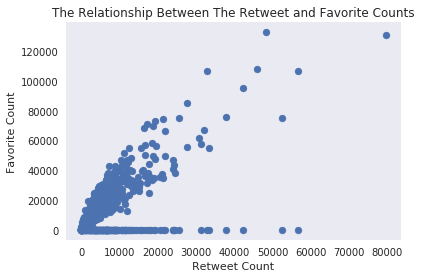

In [40]:
#1. Is there a relationship between the retweet and favourite counts?
#A scatter plot is the right graph for this analysis.

plt.scatter(master.retweet_count, master.favorite_count);
plt.title("The Relationship Between The Retweet and Favorite Counts");
plt.xlabel("Retweet Count");
plt.ylabel("Favorite Count");


The chart shows a strong positive relationships between the count of  retweets and favourites. Although there are outliers,  where the favorite count is zero. Apparently this data extraction error since this is not normal on Twitter, normally the favorite count exceeds the retweet counts such as in our case.

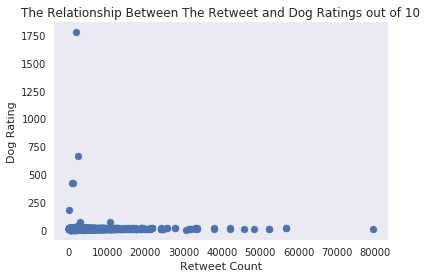

In [41]:
#2. Taking the retweet count as a measure, is there a relationship between the number of retweets and the rating?
#A scatter plot is the right graph for this analysis.

plt.scatter(master.retweet_count, master.rating_numerator);
plt.title("The Relationship Between The Retweet and Dog Ratings out of 10");
plt.xlabel("Retweet Count");
plt.ylabel("Dog Rating");

The chart is not clear due to few ouliers with rating over 100. Perhaps it's better to exclude them and redo the analysis

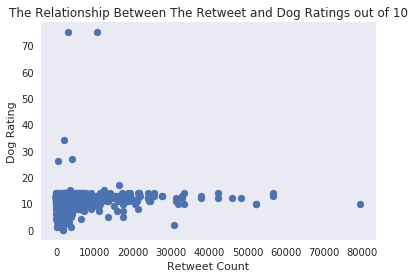

In [42]:
master_2=master.query('rating_numerator<100')

plt.scatter(master_2.retweet_count, master_2.rating_numerator);
plt.title("The Relationship Between The Retweet and Dog Ratings out of 10");
plt.xlabel("Retweet Count");
plt.ylabel("Dog Rating");

Apparently there is no strong relationship between the dog rating and retweet count. In fact the outliers with big rating appear to gather fewer retweets.

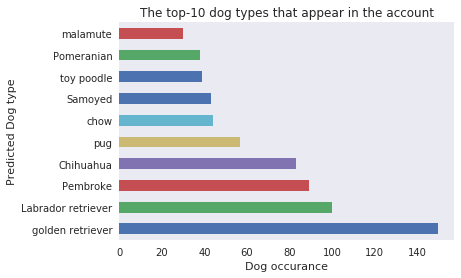

In [43]:
#3. What are the types of dogs that are more frequently featured in the account based on the prediction algorithm (p1)?
#A bar chart is the right graph for this analysis.

master.p1.value_counts().head(10).plot(kind='barh')
plt.title("The top-10 dog types that appear in the account");
plt.ylabel("Predicted Dog type");
plt.xlabel("Dog occurance");

From the graph, it appears that the retriever dogs are the one most ocurring in the account (mid-size dog, could be argued that they are most likly to meet in daily life), followed by small-size dogs (Pembroke, Chihuahua, Pug).

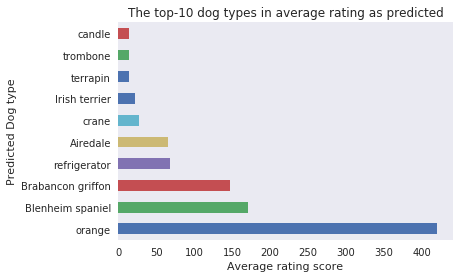

In [44]:
#4. What types of dogs generally have higher rating (p1)??
#A bar chart is the right graph for this analysis.

master.groupby(['p1']).rating_numerator.mean().sort_values(ascending=False).head(10).plot(kind='barh');

plt.title("The top-10 dog types in average rating as predicted");
plt.ylabel("Predicted Dog type");
plt.xlabel("Average rating score");

There are a number of predicted values here that do not appear to be a type of dog (Orange, Refrigerator, Crane). Since there is no simple programatic way of cleaning these, we will leave them as-is.
Other than that the Blenhein Spaniel, Barbancon Griffon, and Airedale dogs are amongsth the highset rated dogs on average (although they are outliers since most ratins do not exceed 25).